<a href="https://colab.research.google.com/github/huskeypm/pten/blob/main/pten_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook serves as a tutorial a computational model of pten/pi3k signaling.
The instructions outline
- executing the computational model
- analyzing its output
- comparing the outputs to validation data
- evaluating a hypothesis that was not part of the 'training' data

***Code execution***:  
To run these commands on your local computer
* Create a copy of the simulation code
```
#git clone https://github.com/rsethi21/na_for_systems_bio/
git clone https://github.com/huskeypm/pten
```
* Execute code
```
python testing_atp.py -s atp_data/substrates_lps.csv -r atp_data/rates.csv -i atp_data/interactions.csv -p output/fitted_params.json -o /tmp/lps/
```

To run within jupyter notebook
* Check out a copy of the simulation code from a github repository
* Follow code blocks below

In [53]:
#!git clone https://github.com/rsethi21/na_for_systems_bio/
!git clone https://github.com/huskeypm/pten

fatal: destination path 'pten' already exists and is not an empty directory.


* The code is passed inputs that contain information about kinetics of the modeled pathways, substrate concentrations etc


In [72]:
%load_ext autoreload
%autoreload 2

In [73]:
import sys
#sys.path.append("./na_for_systems_bio")
sys.path.append("./pten")
#import pten.user_src.testing_atp as tap
import pten.user_src.testing_pkh as tpkh

* Run code below

Note that the network is displayed below

*Extracted this code from the
testing_atp.py script. Merged into testing_pkh for the time being, but RS may want to put this elsewhere.*


In [77]:
fnames = tpkh.runSim(
    amtsAtp = [1.0,1.0],
    ranges = [[60,120]],
    amtsLps = [0.0,1.0]    # need to be same length as amtsAtp
)


LPS = 0
HDACi = 0
LY294-002 = 0
ATP = 0
d[AKT]/dt = k3[pAKT] - r3[AKT][(PIP3^n2 + Km2^n2)/Km2^n2]
d[pAKT]/dt = r3[AKT][(PIP3^n2 + Km2^n2)/Km2^n2] - k3[pAKT]
d[PTEN]/dt = k4[pPTEN] - r4[PTEN][GSK3B] + s2[LPS][pPTEN]
d[pPTEN]/dt = r4[PTEN][GSK3B] - k4[pPTEN] - s2[LPS][pPTEN]
d[PIP2]/dt = k2[PIP3] - r2[PIP2][PI3K][Km1^n1/(PTEN^n1 + Km1^n1)]
d[PIP3]/dt = r2[PIP2][PI3K][Km1^n1/(PTEN^n1 + Km1^n1)] - k2[PIP3]
d[PI3K]/dt = k1[PI3Ks] - r1[PI3K] + s3[Gio][PI3Ks] - s4[PI3K][LY294-002]
d[PI3Ks]/dt = r1[PI3K] - k1[PI3Ks] - s3[PI3Ks][Gio] + s4[LY294-002][PI3K]
d[GSK3B]/dt = k5[pGSK3B] - r5[GSK3B][pAKT] + s1[HDACi]
d[pGSK3B]/dt = r5[GSK3B][pAKT] - k5[pGSK3B]
d[TNFa]/dt = k6[PTEN] - r6[TNFa][pAKT]
d[Phagocytosis]/dt = k7[pAKT] - r7[Phagocytosis][PTEN]
d[P2Y12act]/dt = k8[P2Y12s] - r8[P2Y12act] + s5[ATP][P2Y12s]
d[P2Y12s]/dt = r8[P2Y12act] - k8[P2Y12s] - s5[ATP][P2Y12s]
d[Gio]/dt = k9[P2Y12act] - r9[Gio][Gio]



  0%|          | 0/2 [00:00<?, ?it/s]

0.0


 50%|█████     | 1/2 [00:01<00:01,  1.21s/it]

1.0


100%|██████████| 2/2 [00:01<00:00,  1.03it/s]


* Load data and plot
we should have csv files for different run cases that are listed in fnames. If running simulator code within notebook, fnames is already population. If not, put the filenames in below

In [55]:
#fnames=['atp_1.0_[60, 120]_lps_0.0.csv', 'atp_1.0_[60, 120]_lps_1.0.csv']

In [78]:
import pandas as pd
class empty:pass
conds = dict()

cond = empty()
fname = fnames[0]  # reading fname associated with only using atp
cond.df = pd.read_csv(fname)
conds['atp']=cond

cond = empty()
fname = fnames[1]  # reading fname associated with atp+lps
cond.df = pd.read_csv(fname)
conds['lps+atp']=cond



Here we plot the pAkt as a function of time

In [79]:
import numpy as np



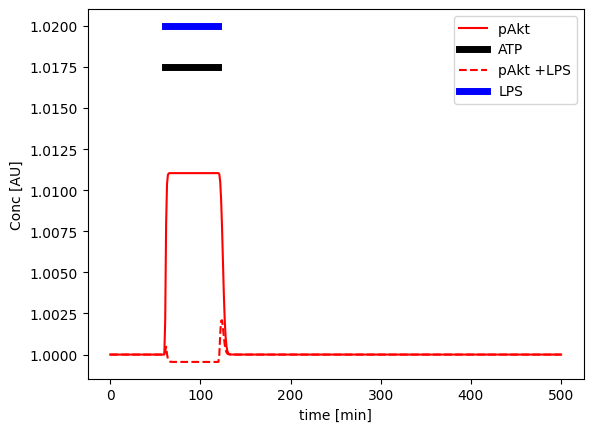

In [80]:
cond = conds['atp']
df = cond.df
#plt.plot( df['LPS'] )
tpkh.Plotter(df,'ATP')


cond = conds['lps+atp']
df = cond.df
#plt.plot( df['LPS'] )
tpkh.Plotter(df,'LPS',tag='+LPS',linestyle='r--',substratePos=.02)



Using hypothetical data here.
In general, these should be populated with actual data from the Wang paper and EMily's experiments

In [81]:
# Emily data (WB)
wATP = [[0.0,60],  # intensity of 0.6 after 60 min. 60-120 is used here since we start ATP at 60 for the numerical model
        [0.2,65],
        [0.2,70],
        [0.5,90],
        [1.0,120]]
wATP = np.asarray(wATP)

# this is HYPOTHETICAL,
wangATP = [[0.0,60],  # intensity of 0.6 after 60 min. 60-120 is used here since we start ATP at 60 for the numerical model
           [1.0,120]]
wangATP = np.asarray(wangATP)



Plot predicted data versus actual data measured by Emily and Wang. *Note that the predictions increase steady-state much faster than was observed by Emily*

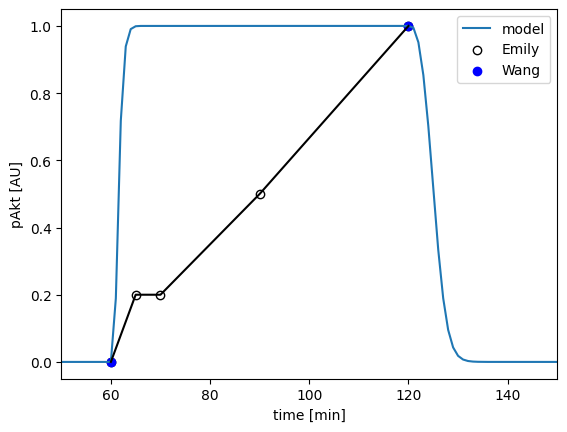

In [82]:
cond = conds['atp']
df = cond.df
pAkt = np.asarray( df['pAKT'] )
npAkt = pAkt - np.min(pAkt)
npAkt /= np.max(npAkt)


ts = np.arange( np.shape(pAkt) [0])

plt.plot(ts,npAkt,label='model')
plt.scatter(wATP[:,1],wATP[:,0],facecolor='white',edgecolor='black',label='Emily')
plt.plot(wATP[:,1],wATP[:,0],'k-')
plt.scatter(wangATP[:,1],wangATP[:,0],facecolor='blue',label='Wang')
plt.xlim([50,150])
plt.ylabel('pAkt [AU]')
plt.xlabel('time [min]')
plt.legend(loc=0)